## Category-7: Bayesian Inference for Marketing signups

> ChildrenBox is a company that sells educational kits to children. They have a subscription based business by which customers who sign up for the service receive one educational kit every month. The marketing department have done a pilot study and tried the following marketing method:

> A: Sending a mail with a colorful brochure that invites people to sign up for a one year kit subscription.


The marketing department sent out 30 mails of type A. Twelve (12) customers that received a mail signed up for one year and marketing now wants to know, how good is method A?

** Question I, Build a Bayesian model that answers the question: What would the rate of sign-up be if method A was used on a larger number of people? **

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

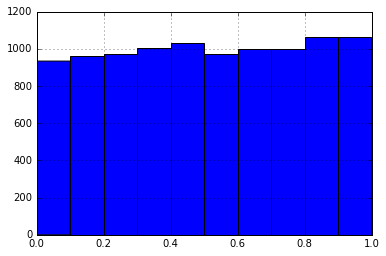

In [2]:
# Step 1: Modeling the prior - which is the belief that we have on the rate of sign-ups before we see the data
# In this case prior is assumed to be a uniform distribution between 0&1-i.e.any rate of signups between 0 & 1 are equally likely

# Number of draws from the prior
num_draws = 10000

# Each draw from the prior
sign_up_rate_prior = pd.Series(np.random.uniform(0,1,num_draws))

sign_up_rate_prior.hist()

In [3]:
# Step 2: Define a generative model
def generative_model(n,p):
    number_success = np.random.binomial(n,p)
    return number_success

In [4]:
# Step 3: Simulate the data from the prior and the generative model
number_of_emails = 60
sim_data = list()
for p in sign_up_rate_prior:
    sim_data.append(generative_model(number_of_emails,p))

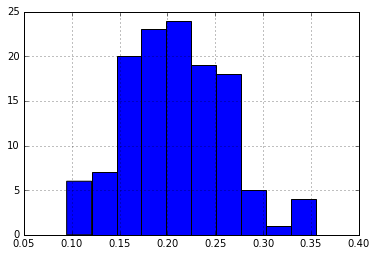

In [5]:
# Step 4: Get the posterior distribution 
# Approximate Bayesian computation - Here you filter off all draws that do not match the data.
observed_data = 12 # Number of people actually signed up
sign_up_rate_posterior = sign_up_rate_prior[list(map(lambda x: x == observed_data, sim_data))]

sign_up_rate_posterior.hist() # Eyeball the posterior

In [6]:
# Summarize the posterior, where a common summary is to take the mean or the median posterior, 
# and perhaps a 95% quantile interval.


print('Number of draws left: %d, Posterior median: %.3f, Posterior quantile interval: %.3f-%.3f' % 
      (len(sign_up_rate_posterior), sign_up_rate_posterior.median(), sign_up_rate_posterior.quantile(.025), 
       sign_up_rate_posterior.quantile(.975)))

Number of draws left: 127, Posterior median: 0.210, Posterior quantile interval: 0.113-0.333


** Question II, How many people will sign-up if this method was used for 100 people **

Likely number of people to signup 21
Sign-up 95% quantile interval 16-25


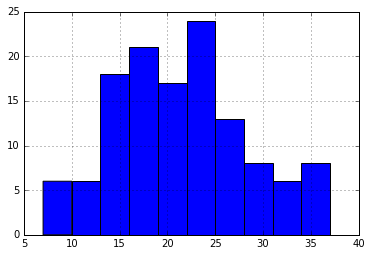

In [7]:
# This can be done with a for loop
number_of_people = 100
signups = list()

for p in sign_up_rate_posterior:
    signups.append(np.random.binomial(number_of_people, p))

signups = pd.Series(signups)
signups.hist()
print('Likely number of people to signup %d' %signups.median())
print('Sign-up 95%% quantile interval %d-%d' % tuple(signups.quantile([.25, .75]).values))

** This is a simple example of using Bayesian inference in a business setting. Watch out for more notebooks on this topic using Stan, PyMC3 etc. **